# Clustering the data and performing classification algorithms

**1&2) Download and load the Dataset into the tool**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.shape

(200, 5)

**3. Perform Below Visualizations**

**i) Univariate Analysis**

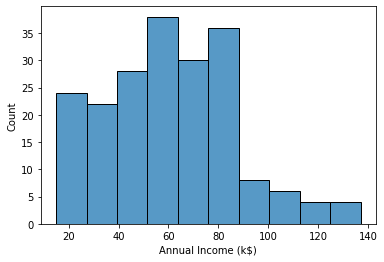

In [ ]:
sns.histplot(df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


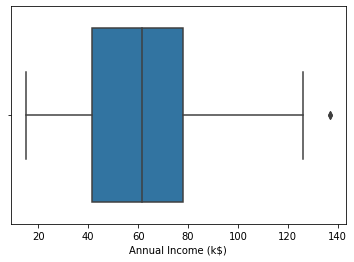

In [ ]:
sns.boxplot(df['Annual Income (k$)'])

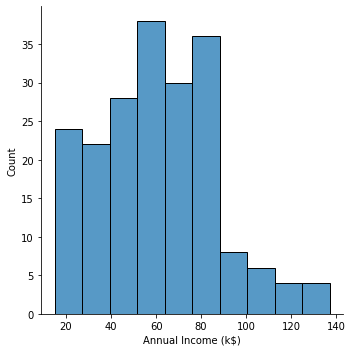

In [ ]:
sns.displot(df['Annual Income (k$)'])

**ii) Bi- Variate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


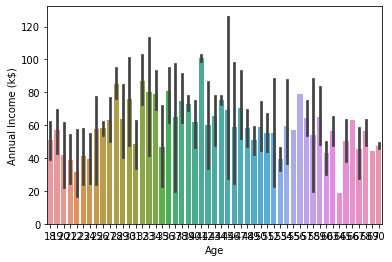

In [ ]:
sns.barplot(df['Age'],df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


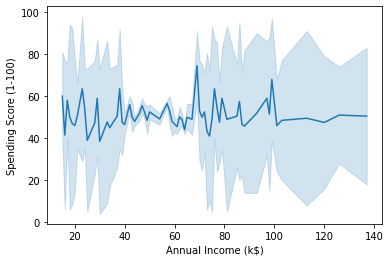

In [ ]:
sns.lineplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


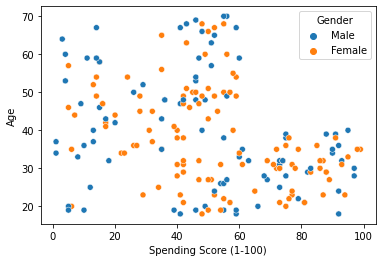

In [ ]:
sns.scatterplot(df['Spending Score (1-100)'],df['Age'],hue = df['Gender'])

iii) Multi-Variate Analysis

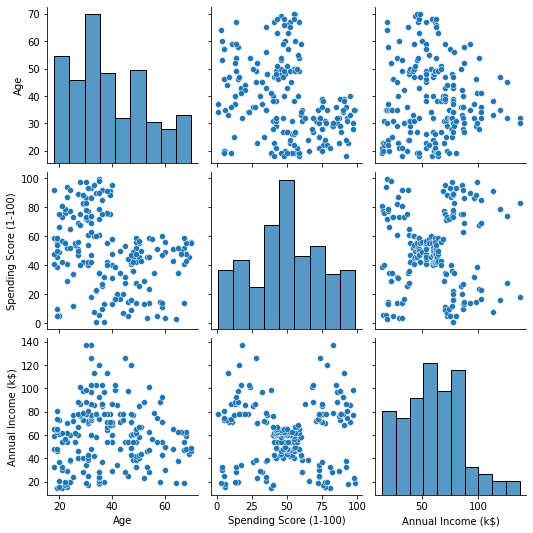

In [ ]:
sns.pairplot(data=df[['Age','Gender','Spending Score (1-100)','Annual Income (k$)']])

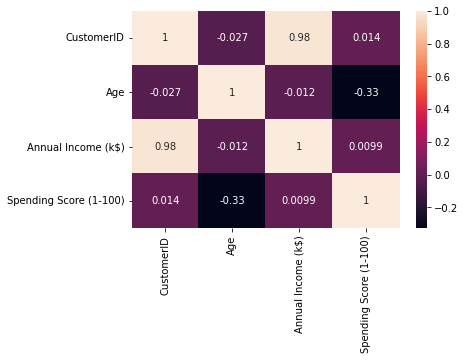

In [ ]:
sns.heatmap(df.corr(),annot=True)

**4. Perform descriptive statistics on the dataset**

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.drop('CustomerID', axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**5. Check for Missing values and deal with them**

In [ ]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

**6. Find the outliers and replace them outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


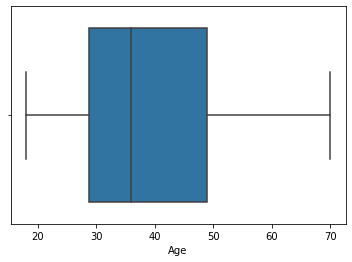

In [ ]:
sns.boxplot(df['Age'])

**7. Check for Categorical columns and perform encoding.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [ ]:
df['Gender'] = l_en.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


**8. Scaling the data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

**9. Perform any of the clustering algorithms**

In [ ]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([3, 3, 1, 1, 1, 1, 5, 1, 6, 1, 6, 1, 5, 1, 0, 3, 1, 3, 6, 1, 3, 3,
       5, 3, 5, 3, 5, 3, 5, 1, 6, 1, 6, 3, 5, 1, 5, 1, 5, 1, 5, 3, 6, 1,
       5, 1, 5, 1, 1, 1, 5, 3, 1, 6, 5, 6, 5, 6, 1, 6, 6, 3, 5, 5, 6, 3,
       5, 5, 3, 1, 6, 5, 5, 5, 6, 3, 5, 3, 1, 5, 6, 3, 6, 5, 1, 6, 5, 1,
       1, 5, 5, 3, 6, 5, 1, 3, 5, 1, 6, 3, 1, 5, 6, 3, 6, 1, 5, 6, 6, 6,
       6, 1, 5, 3, 1, 1, 5, 5, 5, 5, 3, 7, 4, 2, 1, 4, 0, 2, 6, 2, 0, 2,
       1, 4, 0, 4, 7, 2, 0, 4, 7, 2, 1, 4, 0, 2, 6, 4, 7, 2, 0, 2, 7, 4,
       7, 4, 0, 4, 0, 4, 5, 4, 0, 4, 6, 4, 0, 4, 7, 2, 0, 2, 0, 2, 7, 4,
       6, 2, 6, 2, 7, 4, 0, 4, 7, 2, 7, 2, 7, 4, 7, 4, 0, 4, 7, 4, 7, 2,
       0, 2], dtype=int32)

**Add the cluster data, Split the data, Build, Train, Test the Model**

In [ ]:
d1 = pd.DataFrame(data_scaled, columns=df.columns)
d1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [ ]:
d1['kclus'] = pd.Series(res)
d1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,3
1,1.0,0.057692,0.000000,0.816327,3
2,0.0,0.038462,0.008197,0.051020,1
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,1


In [ ]:
d1['kclus'].unique()

array([3, 1, 5, 6, 0, 7, 4, 2], dtype=int32)

In [ ]:
d1['kclus'].value_counts()

5    38
1    37
6    30
3    24
4    22
2    18
0    16
7    15
Name: kclus, dtype: int64

In [ ]:
ind = d1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [ ]:
dep = d1.iloc[:,4:]
dep.head()

,kclus
0,3
1,3
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.409836,0.428571
67,0.0,0.961538,0.270492,0.479592
78,0.0,0.096154,0.319672,0.520408
42,1.0,0.576923,0.196721,0.357143
17,1.0,0.038462,0.049180,0.663265


In [ ]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.254098,0.510204
40,0.0,0.903846,0.188525,0.346939
34,0.0,0.596154,0.147541,0.132653
102,1.0,0.942308,0.385246,0.591837
184,0.0,0.442308,0.688525,0.387755


In [ ]:
y_train.head()

,kclus
116,5
67,5
78,1
42,6
17,3


In [ ]:
y_train.head()

,kclus
116,5
67,5
78,1
42,6
17,3


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[2.73585886],
       [6.4402356 ],
       [4.76394647],
       [6.04675285],
       [4.20880612]])

**Measure the performance using metrics**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  2.3654515302539436
The Root mean squared error is:  1.5380024480650034
The Mean absolute error is:  1.2525535132602892
The accuracy is:  0.5453726171099142
